In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

In [2]:
#from fu import meaning_similarity,load_embeddings

In [3]:
from vect import simi

KeyboardInterrupt: 

In [ ]:
from models import captionning,classification,yolo,detection

C:\Users\Thomas\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified


In [ ]:
#embeddings=load_embeddings('vector.txt')

In [ ]:
def results(image):
    caption=captionning.show_n_generate(image)
    class1=classification.eval(image)
    class1=[tup[0] for tup in class1]
    class1=[x.replace('_',' ') for x in class1]
    class2=detection.get_prediction(image,0.5)[-1]
    class2=[x.replace('_',' ') for x in class2]
    class3=yolo.yolo(image)
    class3=[tup[0] for tup in class3]
    class3=[x.replace('_',' ') for x in class3]
    return caption,class1,class2,class3

In [ ]:
def compare_lists(list1, list2, list3):
    found_in_all = []
    found_in_two = []
    found_in_one = []

    for class1 in list1:
        found = False
        for class2 in list2:
            for class3 in list3:
                sim_score_1_2 = simi(class1, class2)
                sim_score_1_3 = simi(class1, class3)
                sim_score_2_3 = simi(class2, class3)

                if sim_score_1_2 > 0.8 and sim_score_1_3 > 0.8 and sim_score_2_3 > 0.8:
                    found_in_all.append(class1)
                    found = True
                    break
                elif (sim_score_1_2 > 0.8 and sim_score_1_3 > 0.8) or (sim_score_1_2 > 0.8 and sim_score_2_3 > 0.8) or (sim_score_1_3 > 0.8 and sim_score_2_3 > 0.8):
                    found_in_two.append(class1)
                    found = True
                    break

            if found:
                break

        if not found:
            found_in_one.append(class1)

    # Add classes from list2 and list3 not already categorized
    for class2 in list2:
        if class2 not in found_in_all and class2 not in found_in_two:
            found_in_one.append(class2)

    for class3 in list3:
        if class3 not in found_in_all and class3 not in found_in_two:
            found_in_one.append(class3)

    return found_in_all, found_in_two, found_in_one


In [ ]:
def final(found_in_all, found_in_two, found_in_one, caption):
    cap=caption.split()
    p1,p2,p3=0,0,0
    if found_in_all:
        for class_name in found_in_all:
            max_sim = 0
            for word in cap:
                sim = simi(class_name, word)
                if sim > max_sim:
                    max_sim = sim
            p1 += max_sim/len(found_in_all)

    if found_in_two:
        for class_name in found_in_two:
            max_sim = 0
            for word in cap:
                sim = simi(class_name, word)
                if sim > max_sim:
                    max_sim = sim
            p2 += max_sim/len(found_in_two)

    if found_in_one:
        for class_name in found_in_one:
            max_sim = 0
            for word in cap:
                sim = simi(class_name, word)
                if sim > max_sim:
                    max_sim = sim
            p3 += max_sim/len(found_in_one)
    
    if p1==0:
        if p2==0:
            total_score=p3
        elif p3==0:
            total_score=p2
        else:
            total_score=p2*0.7+p3*0.3
    elif p2==0:
        if p1==0:
            total_score=p3
        elif p3==0:
            total_score=p1
        else:
            total_score=p1*0.8+p3*0.2
    elif p3==0:
        if p1==0:
            total_score=p2
        elif p2==0:
            total_score=p1
        else:
            total_score=p1*0.6+p2*0.4
    else:
        total_score=p1*0.6+p2*0.3+p3*0.1

    
    return caption,100*total_score

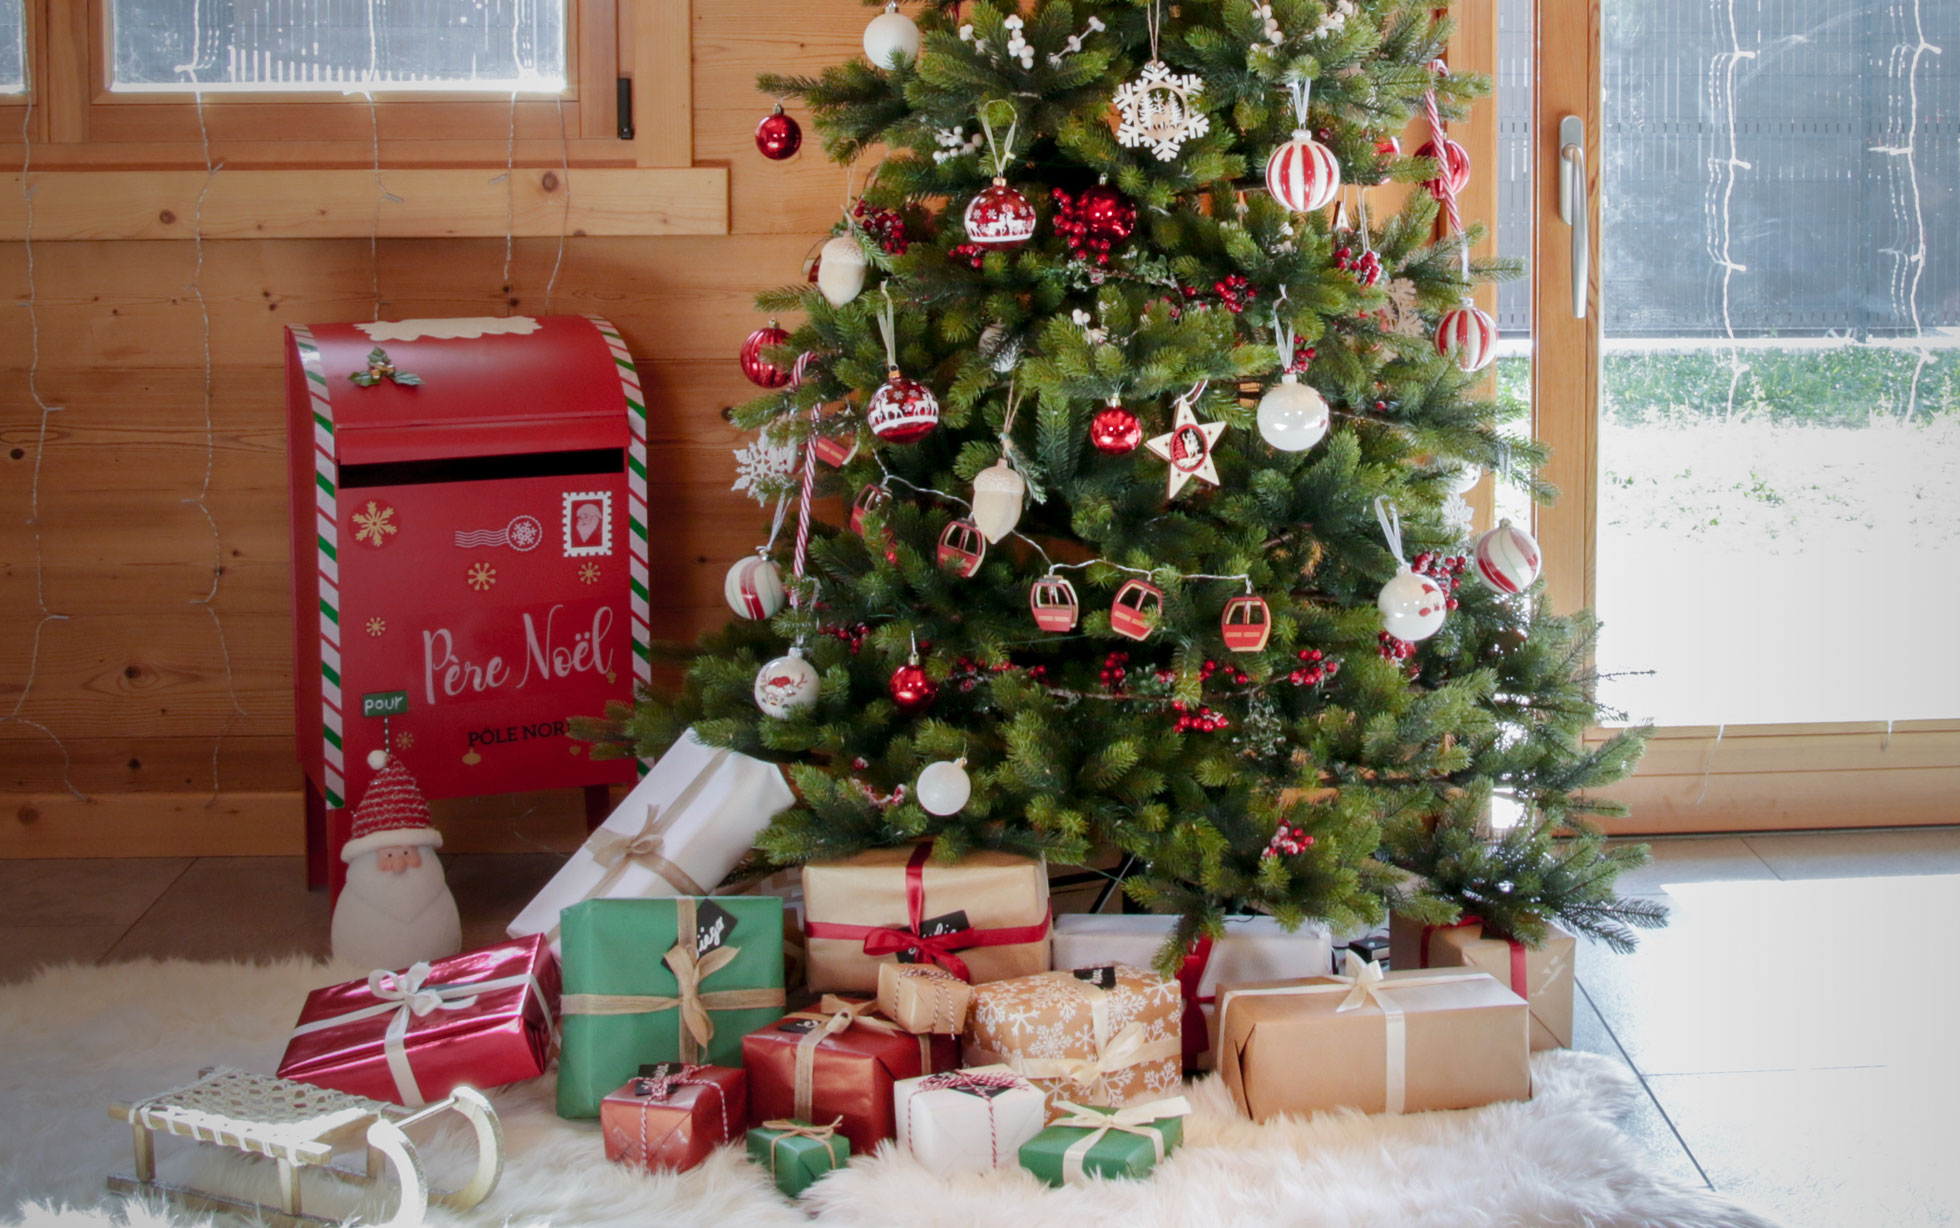

In [ ]:
imag='c:/Stage/Images/500.jpg'
image = Image.open(imag)
display(image)

In [ ]:
res=results(imag)
c=compare_lists(res[1],res[2],res[3])
f=final(c[0],c[1],c[2],res[0])


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.



image 1/1 c:\Stage\Images\500.jpg: 224x224 mailbox 0.54, pot 0.24, crate 0.04, hamper 0.04, chest 0.03, 190.4ms
Speed: 27.4ms preprocess, 190.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


In [ ]:
if f[1]>40:
    print(f[0])
    detection.object_detection_and_save(imag,'c:/Stage/Furtwangen/models/im')
    for i in range (len(res[2])):
        for x in f[0].split():
            if simi(res[2][i],x)>0.5:
                print(captionning.show_n_generate(f'c:/Stage/Furtwangen/models/im/cropped_image_{i}.jpg'))


In [ ]:
res

('a christmas tree with a christmas tree and a christmas tree ',
 ['pine tree'],
 ['suitcase',
  'suitcase',
  'potted plant',
  'vase',
  'potted plant',
  'cake',
  'stop sign',
  'person',
  'vase'],
 ['mailbox'])

In [6]:
np.unique(['je suis beau','ta mere','je suis beau'])[2]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
'''for i in range (1,20):
    a=random.randint(1,300)
    imag=f'c:/Stage/Images/{a}.jpg'
    image = Image.open(imag)
    display(image)
    res=results(imag)
    c=compare_lists(res[1],res[2],res[3])
    print(final(c[0],c[1],c[2],res[0]))'''

"for i in range (1,20):\n    a=random.randint(1,300)\n    imag=f'c:/Stage/Images/{a}.jpg'\n    image = Image.open(imag)\n    display(image)\n    res=results(imag)\n    c=compare_lists(res[1],res[2],res[3])\n    print(final(c[0],c[1],c[2],res[0]))"

In [ ]:
classification.eval(imag)

[('pine_tree', 64.05403017997742)]